# Project 3 Using SVD to Compress Images
__Team Member: Xiaolan Li__

## Introduction
All images we are looking at are a mixture of the colors red, green, and blue displayed by extremely small pixels on the screen. These red, green, and blue pixels range in saturation on a scale of 0 to 255; 0 being completely off, and 255 being completely on. A picture can actually be represented as data in a matrix. This project mainly uses SVD to compress gray layer and color images matrix. What I can actually do to save memory on our image is to compute the SVD and then calculate
some level of precision. The results will be calculated are as follows:
- a. The percentage of the storage memory used for p singular values versus the storage memory used for the original picture, for various values of p. 
- b. The error between the matrix A storing the original image and the reduced matrix A_p obtained when the first p singular values are used.

I'll use Python to write a program that lets users interactively select the image that they want to load, turn the pixel values of the grayscale/color image into a matrix, compute the SVD for us, and then convert our new matrix back into an image for our viewing pleasure with different compressed values which is called 'p_Mode' in this project. The results will be output the compressed images with different p_Mode values, storage bytes of original image and compressed image, the Compression ratio and Error between reduced matrix and original matrix.

## Methodology

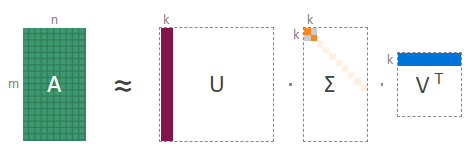

where U and V are orthogonal matrices and the the matrix Σ consists of descending non-negative values on its diagonal and zeros elsewhere. The entries σ1 ≥ σ2 ≥ σ3 ≥ … ≥ 0 on the diagonal of Σ are called the singular values (SVs) of A.

`Formulas:`

SVD: __𝐴 = 𝑈Σ𝑉T__

Max singular value of original image: __max_p = (m * n)/(m+n+1)__

Compressed size: __m * k+k+k * n = k * (1+m +n)__

Pixel of original image: __m * n__

Compression ratio: __((p * (m+n+1))/(m * n)) * 100.0 %__

Error between matrix A storing the original image and the reduced matrix A_p: __sum(sum((A-A_p)^2))__

`Using SVD for gray layer image compression:` Gray layer image is a two dimensional matrix of either R, G or B layer.  I'll choose a number p of singular values to use for the approximation in SVD. The p value in each matrix is stored in a dict named p_Mode in this project. Finally, I'll return the decompressed matrix, which is new approximate image, and then I'll calculate the Compression ratio and Error between reduced matrix and original matrix and plot them out.

`Using SVD for color image compression:` Color image is a three dimensional array matrix. I can decompose a given image into the three color channels red, green and blue. Each channel can be represented as a (m × n)‑matrix with values ranging from 0 to 255. Then I will compress the matrix A representing one of the channels. To do this, I compute an approximation to the matrix A that takes only a fraction of the space to store. I'll choose a number p of singular values that I'm going to use for the approximation. The p value in each matrix is stored in a dict named p_Mode in this project. Finally, adding matrix for R, G & B in new array to get back into a color image for viewing. Before viewing, I'll check if any value will be less than 0 will be converted to its absolute and, if any value is greater than 255 than it will be converted to 255 because in image array of unit8 can only have value between 0 & 255. And then I'll calculate the Compression ratio and Error between reduced matrix and original matrix and plot them out.

## Computer Experiments/Simulations and Results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from ipywidgets import interact
from skimage import data
%matplotlib inline

In [2]:
gray_images = {
    'Einstein': np.asarray(Image.open("data\image\Einstein_tongue.jpg")),
     'camera': data.camera(),
     'coins': data.coins()
}
color_images = {
    'Cara': np.asarray(Image.open("data\image\Cara.jpg")),
    'girl_small': np.asarray(Image.open("data\image\girl_small.jpg")),
    'man': np.asarray(Image.open("data\image\man.jpeg"))
}

In [3]:
def compress_svd(img, p):
    # Perform SVD using np.linalg.svd
    U, s, V = np.linalg.svd(img, full_matrices=False) 
    reconst_matrix = np.dot(U[:,:p],np.dot(np.diag(s[:p]),V[:p,:]))
    return reconst_matrix, s

def compress_gray_images(img_name,Mode):
    error_list = []
    img_list = []
    p_list = []
    compression_ratio_list = []
    
    image = gray_images[img_name]
    m = image.shape[0]
    n = image.shape[1]
    max_p  =int((m*n)/(m+n+1))
    i = 0
    for group in Mode:
        for p in Mode[group]:
            if p > max_p:
                print('compress value k should be less than',max_p)
                return

            reconstruct_img, s = compress_svd(image, p)
            compression_ratio = ((p*(m+n+1))/(m*n)) *100.0
            error = sum(sum((image-reconstruct_img)**2))
            
            img_list.append(reconstruct_img)
            p_list.append(p)
            compression_ratio_list.append(compression_ratio)
            error_list.append(error)

    f_img = plt.figure(figsize=(15,15))
    for i in range(len(img_list)):
        f_img.add_subplot(len(Mode), len(Mode[group]), i+1)
        plt.title('compression ratio = {:.2f}%\n original image: {:d} bytes\n mode {:d}: {:d} bytes\n error: {:}'.format\
                  (compression_ratio_list[i],(m*n),p_list[i],((p_list[i]*(m+n+1))),error_list[i]))
        plt.imshow(img_list[i])
    plt.tight_layout()
    
    f_error, ax_error = plt.subplots()
    ax_error.set_title('{:} image Error'.format(img_name))
    ax_error.set_xlabel('Number of Single Values used')
    ax_error.set_ylabel('Error between compress and original image')
    ax_error.plot(p_list,error_list)
    
def compress_color_images(img_name,Mode):
    error_list = []
    img_list = []
    p_list = []
    compression_ratio_list = []
    
    image = color_images[img_name]
    m = image.shape[0]
    n = image.shape[1]
    max_p  =int((m*n)/(m+n+1))
    i = 0
   
    # splitting the array into three 2D array (svd only apply on 2D array)
    r = image[:,:,0]  # array for R
    g = image[:,:,1]  # array for G
    b = image[:,:,2]  # array for B
    for group in Mode:
        for p in Mode[group]:
            if p > max_p:
                print('compress value k should be less than',max_p)
                return
            # Calculating the svd components for all three arrays
            rr, sr = compress_svd(r,p)
            rg, sg = compress_svd(g,p)
            rb, sb = compress_svd(b,p)

            # Creating a array of zeroes; shape will be same as of image matrix
            rimg = np.zeros(image.shape)
            # Adding matrix for R, G & B in created array
            rimg[:,:,0] = rr
            rimg[:,:,1] = rg
            rimg[:,:,2] = rb
            
            # It will check if any value will be less than 0 will be converted to its absolute
            # and, if any value is greater than 255 than it will be converted to 255
            # because in image array of unit8 can only have value between 0 & 255
            for ind1, row in enumerate(rimg):
                for ind2, col in enumerate(row):
                    for ind3, value in enumerate(col):
                        if value < 0:
                            rimg[ind1,ind2,ind3] = abs(value)
                        if value > 255:
                            rimg[ind1,ind2,ind3] = 255

            # converting the compress image array to uint8 type for further conversion into image object
            reconstruct_img = rimg.astype(np.uint8)
            compression_ratio = (p*(m+n+1))/(m*n)*100
            error = np.linalg.norm(image-reconstruct_img)
            
            img_list.append(reconstruct_img)
            p_list.append(p)
            compression_ratio_list.append(compression_ratio)
            error_list.append(error)
    
    f_img = plt.figure(figsize=(15,15))
    for i in range(len(img_list)):
        f_img.add_subplot(len(Mode), len(Mode[group]), i+1)
        plt.title('compression ratio = {:.2f}%\n original image: {:d} bytes\n mode {:d}: {:d} bytes\n error: {:}'.format\
                  (compression_ratio_list[i],(m*n),p_list[i],((p_list[i]*(m+n+1))),error_list[i]))
        plt.imshow(img_list[i])
    plt.tight_layout()
    
    f_error, ax_error = plt.subplots()
    ax_error.set_title('{:} image Error'.format(img_name))
    ax_error.set_xlabel('Number of Single Values used')
    ax_error.set_ylabel('Error between compress and original image')
    ax_error.plot(p_list,error_list)
    plt.tight_layout()


In [4]:
# return original image max singular value
def get_max_p(image_name, image_type = 'color'):
    if image_type == 'color':
        image = color_images[image_name]
    elif image_type == 'gray':
        image = gray_images[image_name]
    else:
        return 'please set your image type as color or gray'
    m = image.shape[0]
    n = image.shape[1]
    max_p  =int((m*n)/(m+n+1))
    return m,n,max_p
print('Einstein ',get_max_p('Einstein','gray'))
print('Cara ',get_max_p('Cara','color'))

Einstein  (274, 220, 121)
Cara  (956, 826, 442)


In [5]:
p_Mode_Einstein = {1:[1, 2, 4, 6],2:[8, 10, 12, 14],3:[16, 18, 20, 25],4:[50, 75, 100, 121]}
p_Mode_camera = {1:[1, 20, 40, 60],2:[80, 100, 120, 140],3:[160, 180, 230, 255]}
p_Mode_coins = {1:[1, 2, 4, 6],2:[8, 10, 12, 14],3:[16, 18, 20, 25],4:[50, 80, 130, 169]}
@interact
def show_images(img_name = list(gray_images.keys())):
    if img_name == 'Einstein':
        p_Mode = p_Mode_Einstein
    elif img_name == 'camera':
        p_Mode = p_Mode_camera
    elif img_name == 'coins':
        p_Mode = p_Mode_coins
    compress_gray_images(img_name = img_name, Mode = p_Mode)
    

interactive(children=(Dropdown(description='img_name', options=('Einstein', 'camera', 'coins'), value='Einstei…

In [6]:
p_Mode_Cara = {1:[1, 2, 4, 6],2:[8, 10, 12, 14],3:[16, 18, 20, 25],4:[50, 75, 100, 442]}
p_Mode_girl_small = {1:[1, 2, 4, 6],2:[8, 10, 12, 14],3:[16, 18, 20, 25],4:[50, 60, 70, 74]}
p_Mode_man = {1:[1, 20, 40, 60],2:[80, 100, 120, 140],3:[160, 180, 200, 230]}
@interact
def show_images(img_name = list(color_images.keys())):
    if img_name == 'Cara':
        p_Mode = p_Mode_Cara
    elif img_name == 'girl_small':
        p_Mode = p_Mode_girl_small
    elif img_name == 'man':
        p_Mode = p_Mode_man
    compress_color_images(img_name = img_name, Mode = p_Mode)

interactive(children=(Dropdown(description='img_name', options=('Cara', 'girl_small', 'man'), value='Cara'), O…

## Conclusions

For the gray layer image shown by `'Einstein'`, we see that the image size iss 274x220 pixels. By storing the image in its entirety, we can calculate that we would need to store 60,280 different pixel values. There're 4 rows images in the result. The image starts to look very decent along the bottom row,  the last images using modes 50, 75, and 100. By negating the size of Σ since it is so miniscule, we can calculate: 

- Original Image: 60,280 bytes
- Mode 100: 49,500 bytes
- Mode 75: 37,125 bytes
- Mode 50: 24,750 bytes

These modes actually do save on memory quite a bit, more than having the amount of memory used at mode 50, which is represented by the bottom left image. 

We can even graph the error involved in the image compression, or how badly the image differs from the original image. We can gather the data by measuring the error as the difference in our
new image by the differences in our original image and plot it on a graph. The 'Einstein image error' graph starts to show a heavy turn at about 16 modes in, and starts to show a decent image approximately 25 modes in, 50 modes having an extremely low number or error, and 100 modes having a miniscule amount.

---

For the color image shown by `'Cara'`, we can treat the red-scale, green-scale, and blue-scale images just like we did with the grayscale image. This time the values 0 through 255 on our table represent only the saturation of that particular color. We can compute the SVD computation on each of these images separately, and then combine them back together to create our colored image. This image is pretty big, and as you can see, even just by 40 modes of precision, you have a very good idea of what you’re looking at. But to the average person, most people will think that modes 50-100 look relatively the same. The reason for the sharper contrast is because the SVD is very pattern oriented, so those natural patters in the image may show up a little stronger than in the original image. For an image that is 956x826 we have:

- Original Image: 789,656 bytes
- Mode 100: 178,300 bytes
- Mode 75: 133,725 bytes
- Mode 50: 89,150 bytes

The error is using norm of three layers to plot, as the matrix is three dimensional. But we can still see that once we hit that certain point of precision such as 75 modes in this case, we ultimately can’t tell the difference between the compressed and the original image as the error rate becomes so minute, that in the large picture it really doesn’t matter.

## References cited

https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.1038.4532&rep=rep1&type=pdf

http://www.math.utah.edu/~goller/F15_M2270/BradyMathews_SVDImage.pdf

https://medium.com/@rameshputalapattu/jupyter-python-image-compression-and-svd-an-interactive-exploration-703c953e44f6

http://timbaumann.info/svd-image-compression-demo/



## The contribution of each team member to the project 